In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
sns.set_style('dark')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

/Users/hyperion/anaconda/envs/ipykernel_py2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


### 1. Load the dataset Data1.csv
### 2. Load the data using your preferred language/tool set
---

In [2]:
# Let's import in the first csv file
original_df = pd.read_csv('../Data/Data1.csv')
original_df.head()

,A1,A2,A3,A4,A5
0,5.1,3.5,1.4,0.2,a
1,4.9,3.0,1.4,0.2,a
2,4.7,3.2,1.3,0.2,a
3,4.6,3.1,1.5,0.2,a
4,5.0,3.6,1.4,0.2,a


In [3]:
# Check the size of the dataset matches csv file
original_df.shape

(150, 5)

In [4]:
# Check for nulls
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
A1    150 non-null float64
A2    150 non-null float64
A3    150 non-null float64
A4    150 non-null float64
A5    150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


### 3. Split the labels (A5) from the data
---

In [5]:
labels = original_df.A5
labels.head()

0    a
1    a
2    a
3    a
4    a
Name: A5, dtype: object

In [6]:
# How many labels are there?
labels.unique()

array(['a', 'b', 'c'], dtype=object)

In [7]:
df = original_df.iloc[:,:4]
df.head()

,A1,A2,A3,A4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
# Check for outliers in the data
df.describe()

,A1,A2,A3,A4
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Addendum: Does normalizing features impact the optimal number of clusters?
---

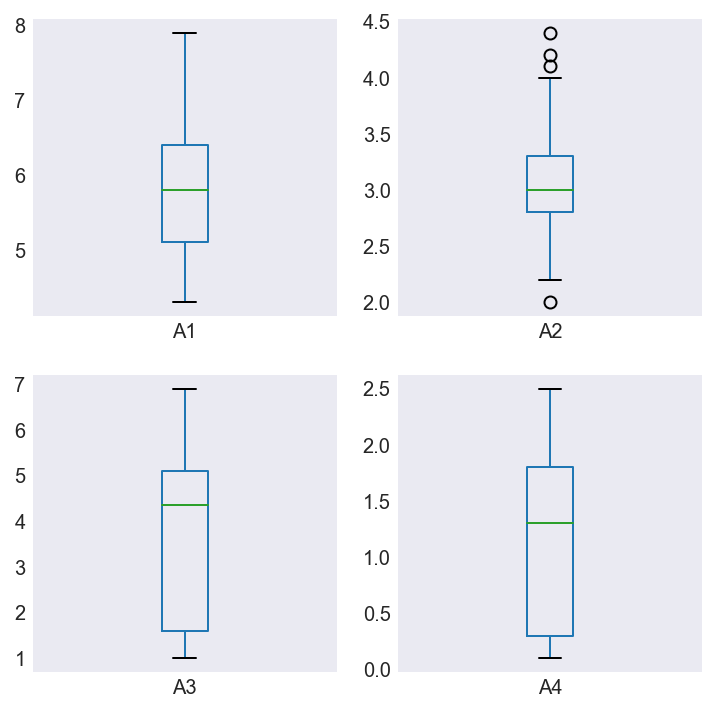

In [9]:
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(6,6), sharex=False, sharey=False)
None

**Note:**

The scale of these features are not too different from each other, so it might not be necessary to standardize even though it is good practice to do so.

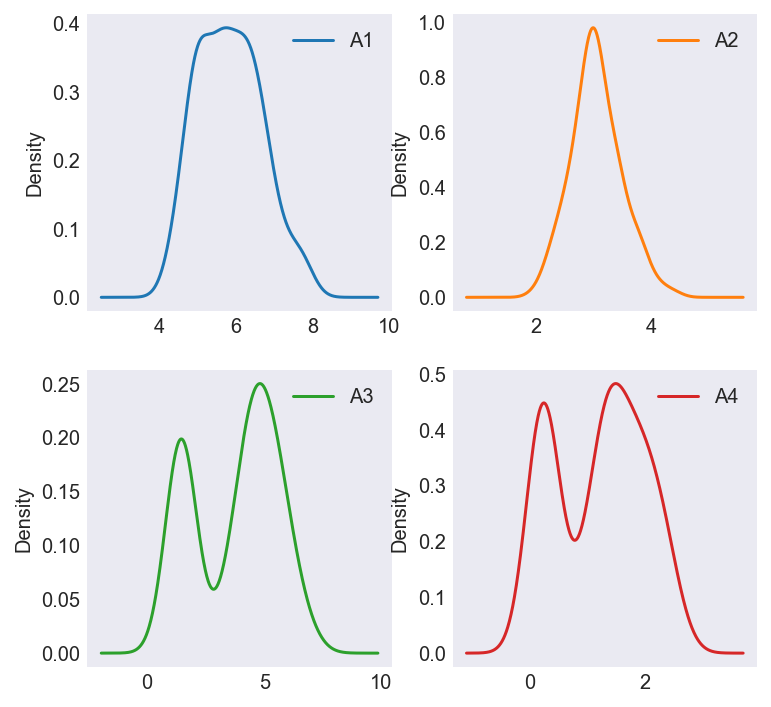

In [10]:
df.plot(kind='density', subplots=True, layout=(2,2), figsize=(6,6), sharex=False, sharey=False)
None

**Pre-processing: **

* A3 and A4 are not normally distributed, so I apply a Min-Max scalar to covert their x values between 0 and 1.
* These results persist if I use a Normalizer or a Robust Scaler to standardize the variables.

In [11]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler, Normalizer
# Standardize Features Matrix using MinMaxScaler to take care of any outliers
scaler = MinMaxScaler()
rescaled_df = scaler.fit_transform(df)
# Summarize transformed data
np.set_printoptions(precision=3)
print(rescaled_df[0:5,:])

[[ 0.222  0.625  0.068  0.042]
 [ 0.167  0.417  0.068  0.042]
 [ 0.111  0.5    0.051  0.042]
 [ 0.083  0.458  0.085  0.042]
 [ 0.194  0.667  0.068  0.042]]


### 4a. Implement an unsupervised clustering model. Include your process for identifying the number of clusters.
---

Let's start with a K-Means Clustering algorithm to find how many clusters there are in the dataset. To identify the _optimal_ number of clusters, I make use of the Silhouette Coefficient.

In [12]:
# Let's run this process recursively from 2 to 20 centroids and calculate the Silhouette Score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
scores = []
for i in range(2,21):
    km = KMeans(n_clusters=i)
    clusters = km.fit_predict(rescaled_df)
    score = silhouette_score(rescaled_df, clusters, metric='euclidean')
    print 'With %s clusters, the Silhouette score is %s' %(i, score)
    scores.append(score)

With 2 clusters, the Silhouette score is 0.630047128435
With 3 clusters, the Silhouette score is 0.50476875654
With 4 clusters, the Silhouette score is 0.445065488046
With 5 clusters, the Silhouette score is 0.352570815572
With 6 clusters, the Silhouette score is 0.337609938349
With 7 clusters, the Silhouette score is 0.32343233699
With 8 clusters, the Silhouette score is 0.325388339543
With 9 clusters, the Silhouette score is 0.32340384641
With 10 clusters, the Silhouette score is 0.320780905661
With 11 clusters, the Silhouette score is 0.332126628049
With 12 clusters, the Silhouette score is 0.336587848281
With 13 clusters, the Silhouette score is 0.330560109187
With 14 clusters, the Silhouette score is 0.313729938323
With 15 clusters, the Silhouette score is 0.322315250762
With 16 clusters, the Silhouette score is 0.313595223945
With 17 clusters, the Silhouette score is 0.306209344318
With 18 clusters, the Silhouette score is 0.301168156605
With 19 clusters, the Silhouette score is 

## Highest Silhouette score from the rescaled data when we still have 2 clusters
---

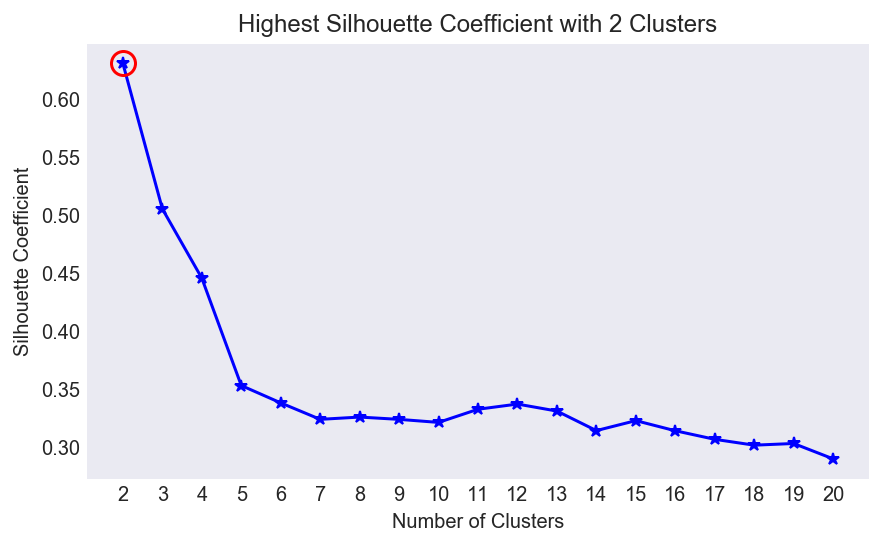

In [13]:
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(range(2,21), scores, 'b*-')
ax.set_xlabel('Number of Clusters')
ax.set_xticks(range(2,21))
ax.set_xticklabels([i for i in range(2,21)])
ax.set_ylabel('Silhouette Coefficient')
ax.set_title('Highest Silhouette Coefficient with 2 Clusters')
ax.plot(2, scores[0], 'o', markersize=12, markeredgewidth=1.5,
         markerfacecolor='None', markeredgecolor='r')
None

In [14]:
km = KMeans(n_clusters=2)
clusters = km.fit_predict(rescaled_df)
# fit_predict = gives us cluster numbers
# fit_transform = gives us centroids
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### 4b. Explain your choice of model against other possible models for clustering. What are the tradeoffs?
---

**Advantages of K-Means**

    K-Means is conceptually one of the easiest clustering algorithms to use. It is relatively simple to understand that within this dataset there are two groups of points which are close to one another as measured by Euclidean distance. K-Means is one of the least computationally intensive algorithms, particularly if we keep the number of clusters small. All it requires is 'k' and it minimizes the within cluster square error.

**Drawbacks of K-Means**

    These are related to some of the assumptions of the K-Means algorithm.

    1. The variance of the distribution of each attribute is spherical
    2. Each cluster is of approximately similar size.  To minimize within-cluster sum of squares, k-means gives more "weight" to larger clusters
    3. K-means is scale dependent. It's not suitable for data with widely varying shapes or densities
    4. A priori we have to specify the number of cluster centroids

**DBSCAN**

    The density-based spatial clustering of applications with noise algorithm (DBSCAN), utilizes the density of the data to identify clusters rather than the first locating an arbitrary number of centroids.
    
    Density-based clustering allows us to identify clusters that are of different (non-spherical) sizes and shapes when compared to centroid-based methods. It can even identify clusters within clusters. By specifying a minimum neighbor count and radius, DBSCAN can identify outliers (or noise clusters). 

    DBSCAN does not work well with higher dimensional data and it takes some tweaking to determine the min neighbor count and radius which will separate noise from the actual clusters.
    
**Hierarchical Clustering**

    Top-down hierarchical clustering, begins by dividing the dataset into 2 clusters and repeating this process within each cluster, until all the clusters are too small or similar. Bottom-up hierarchical clustering, starts with each data item being its own cluster, combining two items that are most similar into a larger cluster and repeating this process until all the clusters left are too dissimilar. K-Means clustering works by dividing data into k sets simultaneously.

    Unlike K-Means, hierarchical clustering works well with non-spherical data and as the algorithm is deterministic, you end up with the same clustering each time. K-Means on the other hand, begins with a random draw of the centroids and may yield slightly different clustering results on different runs of the algorithm. Heirarchical clustering is slower to run than K-Means.

### 5a. Using dimensionality reduction, create a visualization of the clusters you created.
---

I use Principal Components Analysis to reduce the dataset down to the two components that explain the maximum variance of the data.

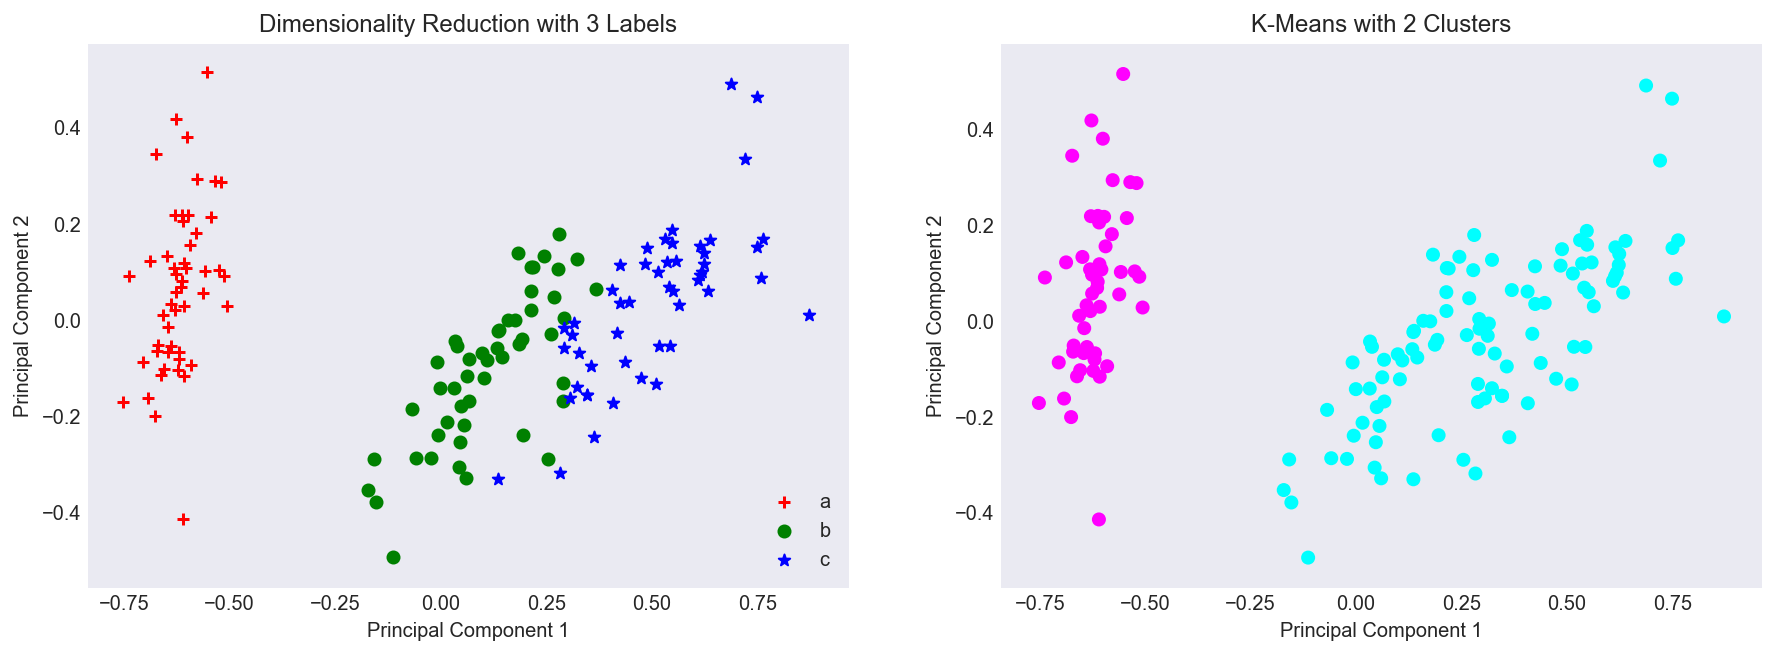

In [15]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
results = pca.fit_transform(rescaled_df)
# Let's plot the reduced feature set
(fig, ax) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i in range(0, results.shape[0]):
    if original_df.A5[i] == 'a':
        c1 = ax[0].scatter(results[i,0],results[i,1],c='r',marker='+')
    elif original_df.A5[i] == 'b':
        c2 = ax[0].scatter(results[i,0],results[i,1],c='g',marker='o')
    elif original_df.A5[i] == 'c':
        c3 = ax[0].scatter(results[i,0],results[i,1],c='b',marker='*')
ax[0].legend([c1, c2, c3], ['a','b','c'], loc='lower right')
ax[0].set_title('Dimensionality Reduction with 3 Labels')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

kmeans = KMeans(n_clusters=2, random_state = 123)
kmeans.fit(rescaled_df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
ax[1].scatter(results[:,0], results[:,1], c=labels, cmap='cool')
ax[1].set_title('K-Means with 2 Clusters')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
None

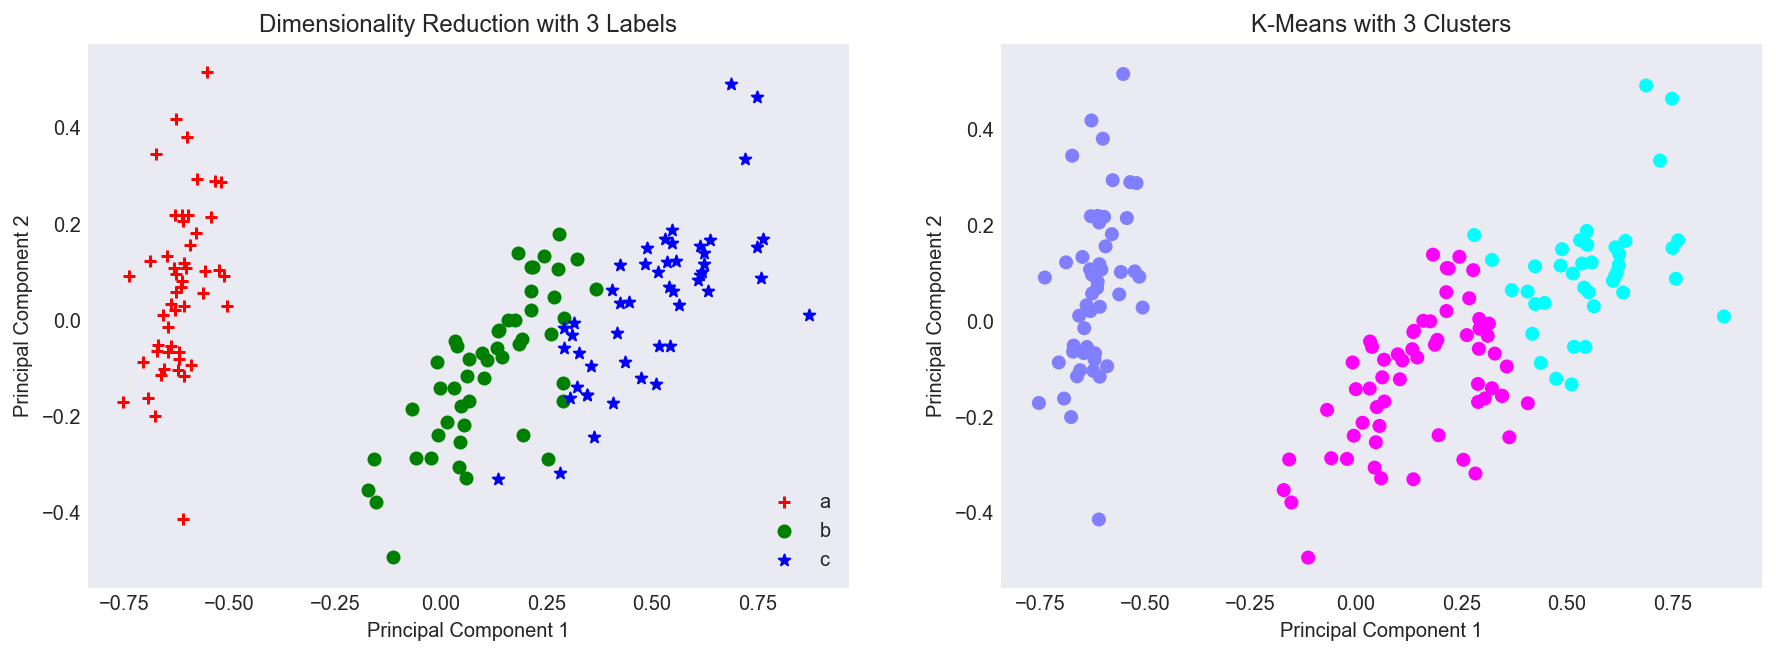

In [16]:
# Let's plot the reduced feature set with 3 clusters
(fig, ax) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i in range(0, results.shape[0]):
    if original_df.A5[i] == 'a':
        c1 = ax[0].scatter(results[i,0],results[i,1],c='r',marker='+')
    elif original_df.A5[i] == 'b':
        c2 = ax[0].scatter(results[i,0],results[i,1],c='g',marker='o')
    elif original_df.A5[i] == 'c':
        c3 = ax[0].scatter(results[i,0],results[i,1],c='b',marker='*')
ax[0].legend([c1, c2, c3], ['a','b','c'], loc='lower right')
ax[0].set_title('Dimensionality Reduction with 3 Labels')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

kmeans = KMeans(n_clusters=3, random_state = 123)
kmeans.fit(rescaled_df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
ax[1].scatter(results[:,0], results[:,1], c=labels, cmap='cool')
ax[1].set_title('K-Means with 3 Clusters')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
None

### 5b. DBSCAN
---
By comparison, a density based clustering algorithm performs slightly better at distinguishing between the 3 clusters.

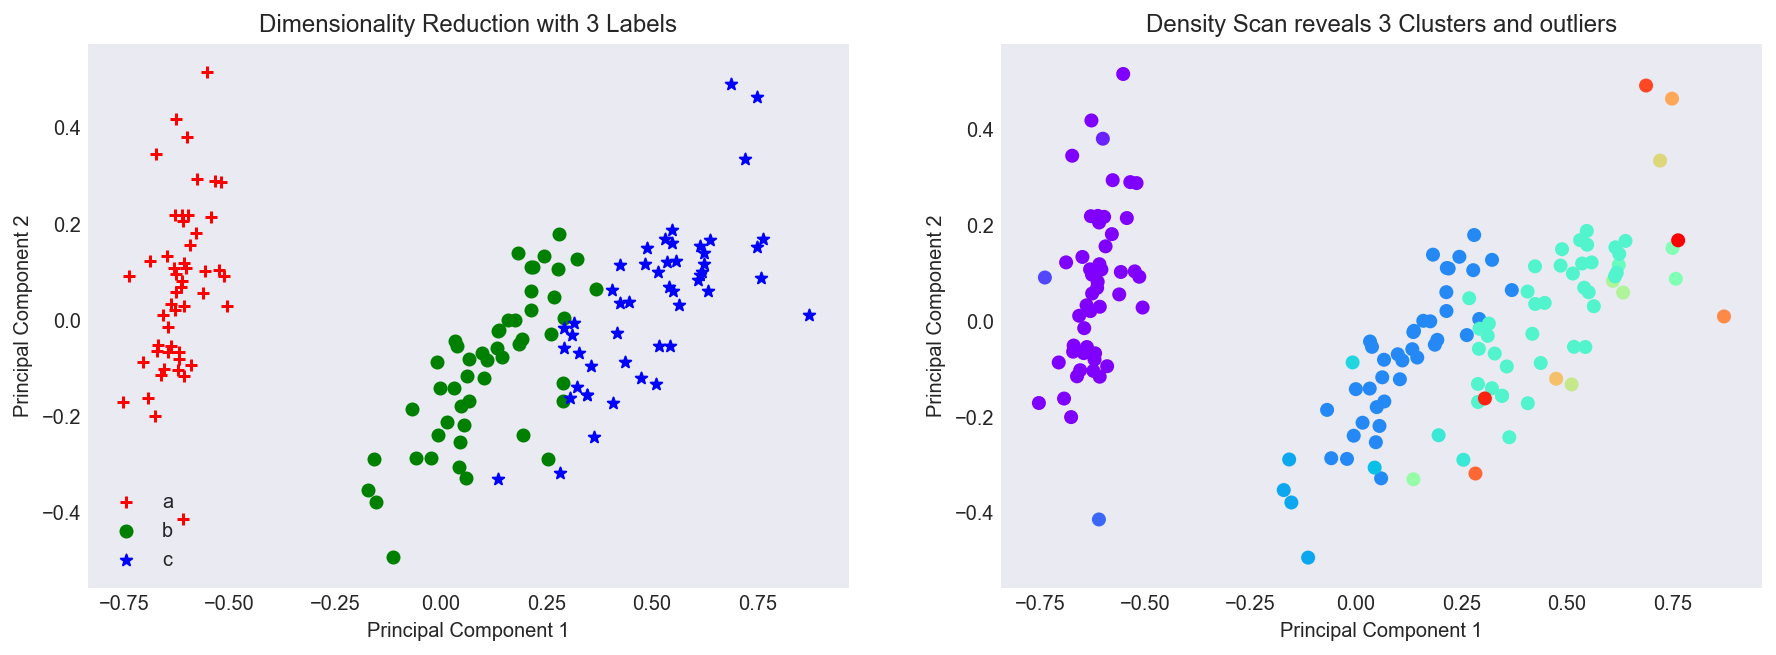

In [17]:
dbscan = DBSCAN(eps=0.4, min_samples=1)
dbscan.fit_predict(df)
dblabels = dbscan.labels_
# Let's plot the reduced feature set
(fig, ax) = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
for i in range(0, results.shape[0]):
    if original_df.A5[i] == 'a':
        c1 = ax[0].scatter(results[i,0],results[i,1],c='r',marker='+')
    elif original_df.A5[i] == 'b':
        c2 = ax[0].scatter(results[i,0],results[i,1],c='g',marker='o')
    elif original_df.A5[i] == 'c':
        c3 = ax[0].scatter(results[i,0],results[i,1],c='b',marker='*')
ax[0].legend([c1, c2, c3], ['a','b','c'])
ax[0].set_title('Dimensionality Reduction with 3 Labels')
ax[0].set_xlabel('Principal Component 1')
ax[0].set_ylabel('Principal Component 2')

kmeans = KMeans(n_clusters=2, random_state = 123)
kmeans.fit(df)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
ax[1].scatter(results[:,0], results[:,1], c=dblabels, cmap='rainbow')
ax[1].set_title('Density Scan reveals 3 Clusters and outliers')
ax[1].set_xlabel('Principal Component 1')
ax[1].set_ylabel('Principal Component 2')
None

### Final Thoughts
---
Even after rescaling the data, I note that the optimal number of clusters as determined by the maximized Silhouette Coefficient is 2. This translates to 2 clusters of points identified by K-Means as opposed to 3 actual clusters found in the data. 

Visualizing (labeled) pairs of features together in the **original** dataset we see 3 clusters appear in every joint pairing. Interestingly we note the overlap between clusters 'b' and 'c' in the raw data which was grouped into a single cluster by K-Means irrespective of scaling. This gives a bit more insight into why our poor clusterer was having trouble distinguishing these clusters.

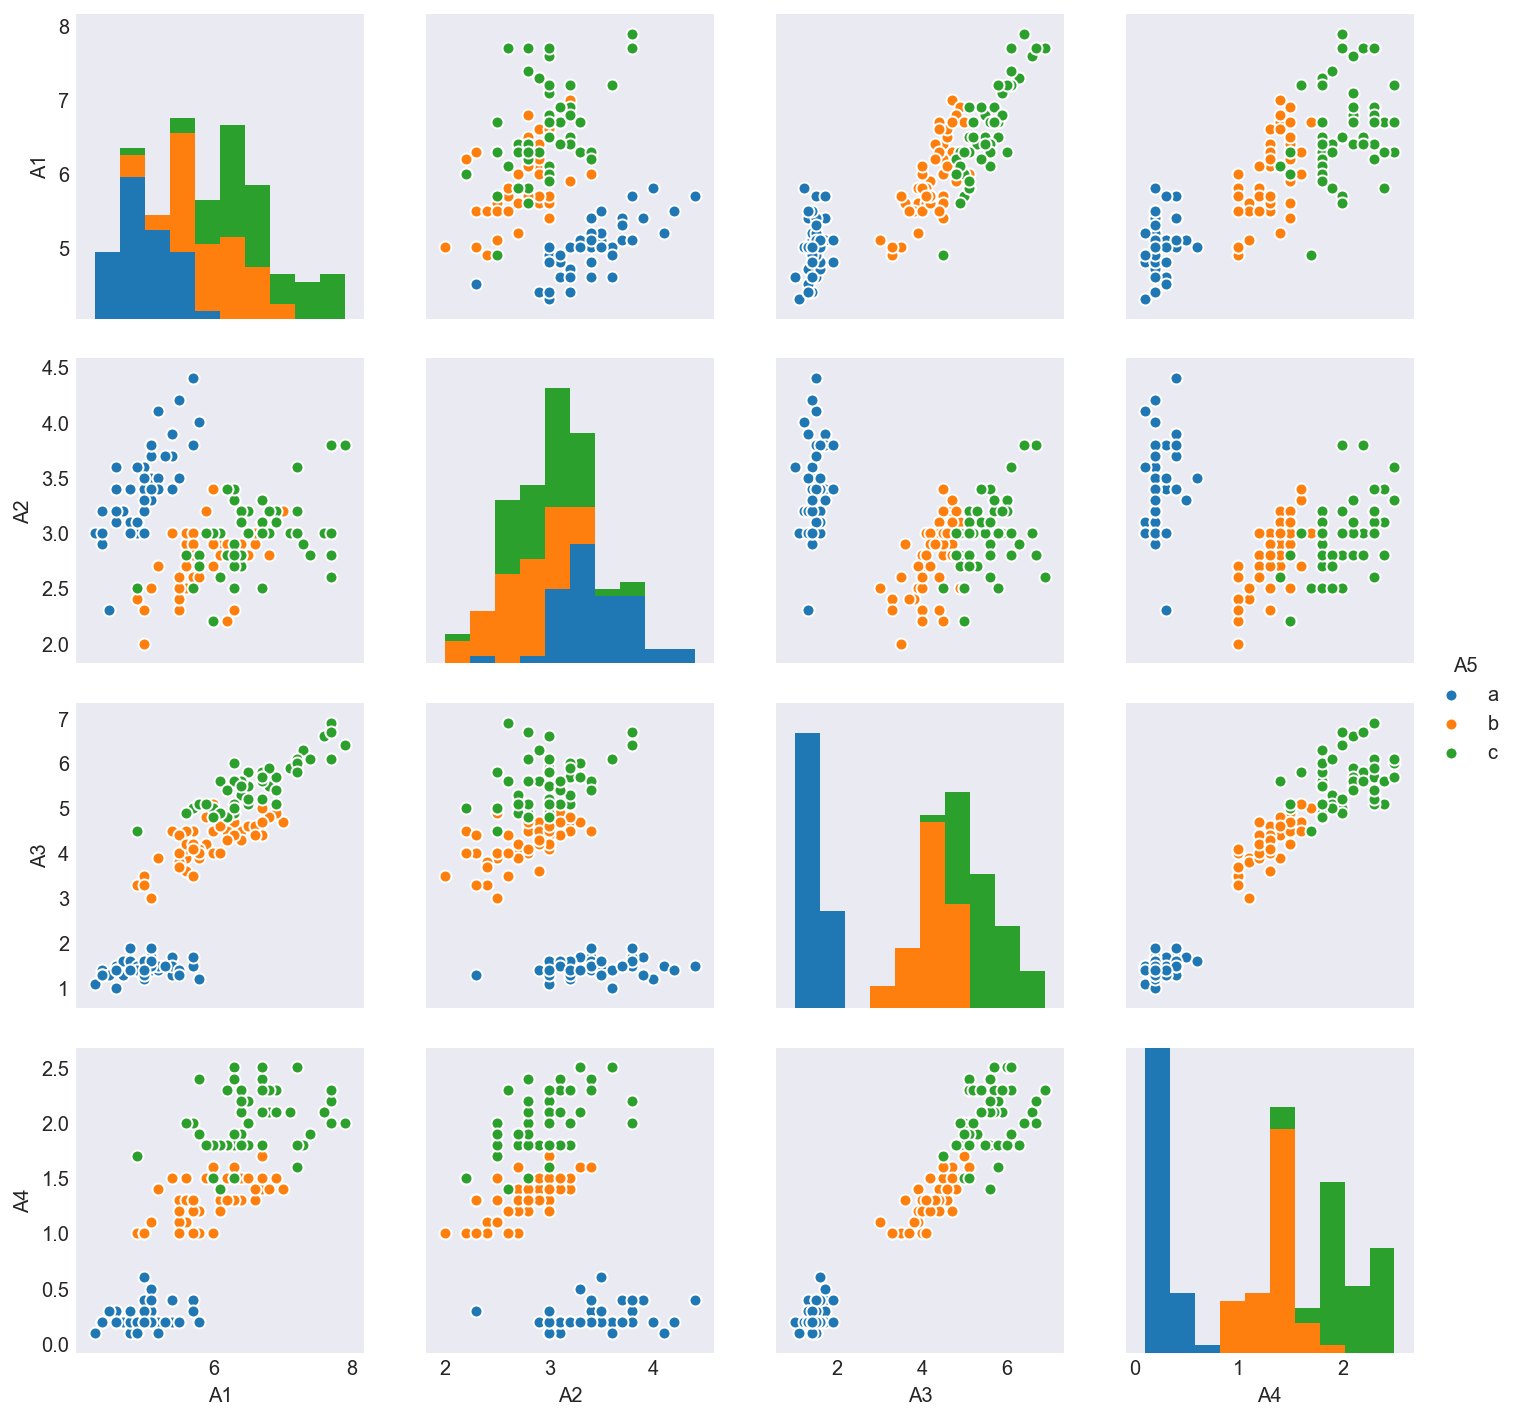

In [18]:
sns.pairplot(original_df, hue='A5')
None